In [1]:
import rpy2
import sys
sys.path.append('/home/thies/repos/BIU/') # Modify this to where you have downloaded the BIU library
import biu
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['svg.fonttype'] = 'none'

import seaborn as sns
import scipy

R = biu.R()
from rdmpy import RDM
RDM.meta(source="repos/IsalaFlow2QuestionnaireCleaning/clean.ipynb")

# Load the questionnaire

In [56]:
with RDM("/home/thies/repos/UA_isala/flow2/data/questionnaires/processed/F2Q.anonymised.pkl", 'r') as ifd:
    Q = pd.read_pickle(ifd)
#ewith

Q = Q[~(Q['F2Q_00_13_00_00_v|External Data Reference'] == '')]
Q = Q.applymap(lambda x: None if (x == '') else x)

## Create sample identifiers

In [57]:
Q['participant'] = Q['F2Q_00_13_00_00_v|External Data Reference']
Q['timepoint']   = Q['F2Q_00_00_00_00_v|Timepoint']
Q['sample_id']   = Q.apply(lambda x: '_'.join(x[['participant', 'timepoint']]), axis=1)


## Check missing and duplicate responses from participants

### Duplicate/triplicate responses

Some participants have duplicate or triplicate responses to some questionnaires. So let's take the most complete reference (based on `F2Q_00_05_00_00_v|Progress`)

In [58]:
duplicate_responses = biu.ops.lst.qerf(Q.sample_id)
print("Duplicate sample_ids: ", duplicate_responses[2])
print("Triplicate sample_ids: ", duplicate_responses[3])

# Choose the most complete:
Q = Q[Q['F2Q_00_05_00_00_v|Progress'] == Q[['sample_id','F2Q_00_05_00_00_v|Progress']].groupby('sample_id').transform(lambda x: x.max())['F2Q_00_05_00_00_v|Progress']]

# And now if we still have duplicates, take the first completed:
Q = Q[Q['F2Q_00_02_00_00_v|End Date'] == Q[['sample_id','F2Q_00_02_00_00_v|End Date']].groupby('sample_id').transform(lambda x: x.min())['F2Q_00_02_00_00_v|End Date']]

Duplicate sample_ids:  ['ISALA03991_S09', 'ISALA00076_S09', 'ISALA00862_S09', 'ISALA03991_S10', 'ISALA00076_S10', 'ISALA03991_S11', 'ISALA00076_S11']
Triplicate sample_ids:  ['ISALA06028_S01']


### Check missing responses

<AxesSubplot:xlabel='participant', ylabel='timepoint'>

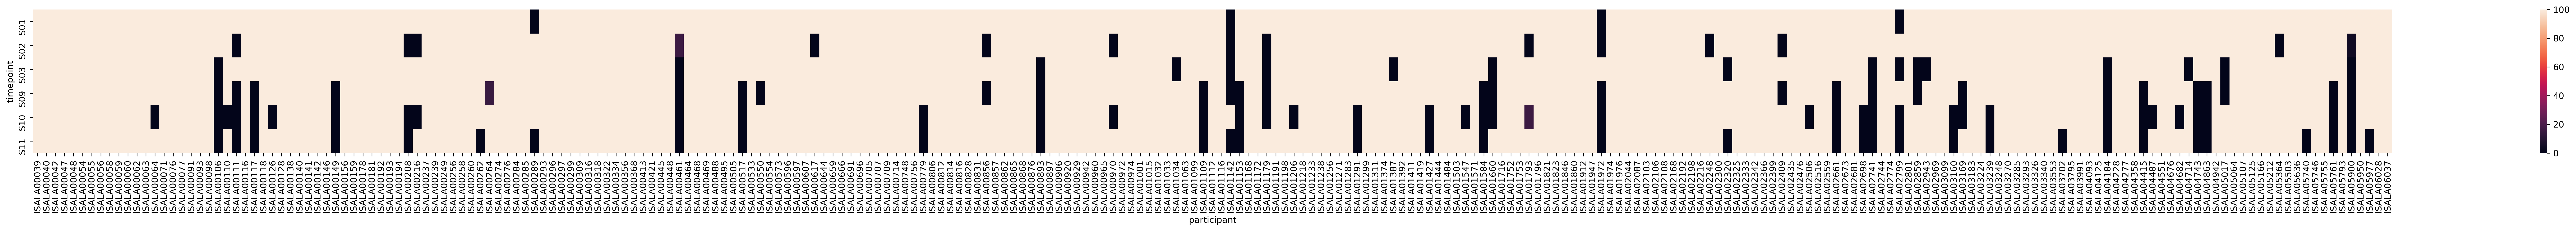

In [59]:
Q_missing = Q.pivot(index='participant', columns='timepoint', values='F2Q_00_05_00_00_v|Progress')
Q_missing = Q_missing.fillna(0)

fig, axes = biu.utils.figure.subplots(figsize=(60, 3))
sns.heatmap(Q_missing.transpose(), ax=axes[0])

# Clean questions

## Base data frame

In [60]:
QC = Q[['sample_id', 'participant', 'timepoint']].copy()

In [61]:
sorted(Q.columns)

['F2Q_00_00_00_00_v|Timepoint',
 'F2Q_00_01_00_00_v|Start Date',
 'F2Q_00_02_00_00_v|End Date',
 'F2Q_00_03_00_00_v|Response Type',
 'F2Q_00_05_00_00_v|Progress',
 'F2Q_00_06_00_00_v|Duration (in seconds)',
 'F2Q_00_07_00_00_v|Finished',
 'F2Q_00_08_00_00_v|Recorded Date',
 'F2Q_00_09_00_00_v|Response ID',
 'F2Q_00_13_00_00_v|External Data Reference',
 'F2Q_00_16_00_00_v|Distribution Channel',
 'F2Q_00_17_00_00_v|User Language',
 'F2Q_01_02_00_00_v|Door COVID-19 en andere omstandigheden is het mogelijk dat je gewicht is gewijzigd en hierdoor vragen we om dit nogmaals in te vullen. Wat is je gewicht uitgedrukt in kg?',
 'F2Q_01_03_01_00_v|Is je seksuele relatiestatus recent gewijzigd?',
 'F2Q_01_03_02_00_v|Is je seksuele relatiestatus gewijzigd sinds de vorige staalname?',
 "F2Q_01_04_00_00_v|Heb je de afgelopen 24u zoveel gedronken waardoor je 's nachts moest opstaan om te plassen?",
 'F2Q_01_05_01_00_v|Hoeveel porties heb je van de onderstaande zaken gedronken in de afgelopen 48 uur (

## Stress

In [62]:
# column of question
c = 'F2Q_01_14_02_00_v|Voelde je je sinds de vorige staalname gemiddeld somberder en/of meer gestresseerd dan normaal?'

# All responses to this question:
print(biu.ops.lst.freq(Q[c]))

QC['Health.Mental.More_stress.week'] = Q[c].apply(lambda x: None if pd.isna(x) else x == 'Ja')
QC['Health.Mental.Less_stress.week'] = Q[c].apply(lambda x: None if pd.isna(x) else x == 'Minder dan eerder aangegeven')
QC['Health.Mental.Same_stress.week'] = Q[c].apply(lambda x: None if pd.isna(x) else x == 'Hetzelfde')

{nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1,

## Sex in last week

In [63]:
c = 'F2Q_01_15_00_00_v|Had je de afgelopen week seks? Hiermee bedoelen we allerlei vormen van stimulatie van de vagina, vulva, clitoris en anus, waaronder manuele, orale, vaginale en anale seks, masturbatie,…(al dan niet met vaginale penetratie)'

# All responses to this question:
print(biu.ops.lst.freq(Q[c]))

QC['Intimacy.Sex.week'] = Q[c].apply(lambda x: None if pd.isna(x) else x == 'Ja')

{'Nee': 380, 'Ja': 1046, None: 4}


In [64]:
## Different types of sex in last 24 hours

allC = [
    'F2Q_01_16_01_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Manuele seks',
    'F2Q_01_16_02_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Orale seks',
    'F2Q_01_16_03_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Vaginale penetratie met vingers',
    'F2Q_01_16_04_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Vaginale penetratie met penis',
    'F2Q_01_16_05_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Vaginale penetratie met speeltjes',
    'F2Q_01_16_06_00_t|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Vaginale penetratie met andere: - tekst',
    'F2Q_01_16_06_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Vaginale penetratie met andere:',
    'F2Q_01_16_08_00_t|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Andere: - tekst',
    'F2Q_01_16_08_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Andere:',
    'F2Q_01_16_11_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Vaginale seks zonder penetratie',
    'F2Q_01_16_12_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Anale seks',
    'F2Q_01_16_13_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Nee'
]

C = {
 "Intimacy.masturbation.24h"               : 'F2Q_01_16_01_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Manuele seks',
 "Intimacy.Oral.sex.24h"                   : 'F2Q_01_16_02_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Orale seks',
 "Intimacy.Vaginal.Penetration_finger.24h" : 'F2Q_01_16_03_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Vaginale penetratie met vingers',
 "Intimacy.Vaginal.Penetration_penis.24h"  : 'F2Q_01_16_04_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Vaginale penetratie met penis',
 "Intimacy.Vaginal.Penetration_toy.24h"    : 'F2Q_01_16_05_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Vaginale penetratie met speeltjes',
 "Intimacy.Vaginal.Nopenetration.24h"      : 'F2Q_01_16_11_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Vaginale seks zonder penetratie',
 "Intimacy.Anal.Penetration.24h"           : 'F2Q_01_16_12_00_v|Heb je de afgelopen 24 uur de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)? (Meerdere antwoorden mogelijk) - Selected Choice - Anale seks',
}

background = 'F2Q_01_16|background'

Q[background] = Q[allC].isna().apply(all, axis=1)

for k, v in C.items():
    print(biu.ops.lst.freq(Q[v]))
    
    QC[k] = Q[[background, v]].apply(lambda r: None if r[0] else False if pd.isna(r[1]) else True, axis=1)
    print(biu.ops.lst.freq(QC[k]))
#efor
    

{None: 978, 'Manuele seks': 452}
{None: 384, True: 452, False: 594}
{None: 1265, 'Orale seks': 165}
{None: 384, True: 165, False: 881}
{None: 1179, 'Vaginale penetratie met vingers': 251}
{None: 384, False: 795, True: 251}
{None: 1092, 'Vaginale penetratie met penis': 338}
{None: 384, True: 338, False: 708}
{None: 1321, 'Vaginale penetratie met speeltjes': 109}
{None: 384, False: 937, True: 109}
{None: 1342, 'Vaginale seks zonder penetratie': 88}
{None: 384, False: 958, True: 88}
{None: 1418, 'Anale seks': 12}
{None: 384, False: 1034, True: 12}


## Menstrual hygiene products

In [65]:
allC = [
    'F2Q_01_20_01_00_v|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Selected Choice - Tampon',
    'F2Q_01_20_02_00_v|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Selected Choice - Maandverband',
    'F2Q_01_20_03_00_v|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Selected Choice - Menstruatiecup',
    'F2Q_01_20_04_00_v|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Selected Choice - Inlegkruisje',
    'F2Q_01_20_05_00_t|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Andere: - tekst',
    'F2Q_01_20_05_00_v|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Selected Choice - Andere:',
    'F2Q_01_20_06_00_v|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Selected Choice - Nee'
]

C = {
    'Hygiene.Vaginal.Tampon.48h' : 'F2Q_01_20_01_00_v|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Selected Choice - Tampon',
    'Hygiene.Vaginal.Pad.48h' : 'F2Q_01_20_02_00_v|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Selected Choice - Maandverband',
    'Hygiene.Vaginal.Cup.48h' : 'F2Q_01_20_03_00_v|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Selected Choice - Menstruatiecup',
    'Hygiene.Vaginal.Pantyliner.48h' : 'F2Q_01_20_04_00_v|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Selected Choice - Inlegkruisje',
}

other_c        = 'F2Q_01_20_05_00_t|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Andere: - tekst'
inlegkruis_c   = 'F2Q_01_20_04_00_v|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Selected Choice - Inlegkruisje'
maandverband_c = 'F2Q_01_20_02_00_v|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Selected Choice - Maandverband'

inlegkruis_options = {
    'wasbaar maandverband en inlegkruisje',
    'nieuw soort inlegkruisje - zonder plastiek',
    'herbruikbaar inlegkruisje',
    'wasbaar inlegkruis'
                      }

maandverband_options = {
    'wasbaar maandverband en inlegkruisje',
    'Herbruikbaar maandverband',
    'herbruikbaar maandverband ondergoed (als extra bij de cup)',
    'Wasbaar maandverband ',
    'wasbaar maandverband',
}

Q[inlegkruis_c]   = Q[[other_c, inlegkruis_c]].apply(  lambda r: r[1] if r[0] is None else (None if r[0] not in inlegkruis_options   else r[0]) if pd.isna(r[1]) else r[1], axis=1)
Q[maandverband_c] = Q[[other_c, maandverband_c]].apply(lambda r: r[1] if r[0] is None else (None if r[0] not in maandverband_options else r[0]) if pd.isna(r[1]) else r[1], axis=1)

background = 'F2Q_01_20|background'

Q[background] = Q[allC].isna().apply(all, axis=1)

for k, v in C.items():
    QC[k] = Q[[background, v]].apply(lambda r: None if r[0] else False if pd.isna(r[1]) else True, axis=1)
    print(k, biu.ops.lst.freq(QC[k]))
#efor

Hygiene.Vaginal.Tampon.48h {False: 1326, True: 100, None: 4}
Hygiene.Vaginal.Pad.48h {True: 176, False: 1250, None: 4}
Hygiene.Vaginal.Cup.48h {False: 1348, True: 78, None: 4}
Hygiene.Vaginal.Pantyliner.48h {True: 402, False: 1024, None: 4}


In [66]:
biu.ops.lst.freq(Q['F2Q_01_20_05_00_t|Heb je de volgende producten de afgelopen 48 uur gebruikt? (Meerdere antwoorden mogelijk) - Andere: - tekst'])

{None: 1412,
 'Cheeky pants': 1,
 'wasbaar maandverband en inlegkruisje': 1,
 'Herbruikbaar maandverband': 1,
 'herbruikbaar maandverband ondergoed (als extra bij de cup)': 2,
 'menstruatieonderbroek': 1,
 'nieuw soort inlegkruisje - zonder plastiek': 1,
 'Tena': 1,
 'menstruatieondergoed': 1,
 'herbruikbaar inlegkruisje': 1,
 'Menstruatie-ondergoed': 1,
 'Wcpapier': 1,
 'menstruatieonderbroek Thinx': 1,
 'Wasbaar maandverband ': 1,
 'wasbaar inlegkruis': 1,
 'wasbaar maandverband': 1,
 'Menstruatieonderbroek': 1,
 'Vochtige intieme doekjes': 1}

In [67]:
allC = [
 'F2Q_01_21_01_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Roodheid',
 'F2Q_01_21_02_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Zwelling',
 'F2Q_01_21_03_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Pijn (algemeen)',
 'F2Q_01_21_04_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Jeuk',
 'F2Q_01_21_05_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Branderig gevoel',
 'F2Q_01_21_06_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Toename in vaginale afscheiding (anders dan de normale maandelijkse afscheiding)',
 'F2Q_01_21_07_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Verandering in de vaginale afscheiding (andere kleur, onaangename geur)',
 'F2Q_01_21_08_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Pijn tijdens seksueel contact',
 'F2Q_01_21_11_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Blaasontsteking',
 'F2Q_01_21_09_00_t|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Andere: - tekst',
 'F2Q_01_21_09_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Andere:',
 'F2Q_01_21_10_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Nee',
]

C = {
 "Health.Vaginal.Redness.week"               : 'F2Q_01_21_01_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Roodheid',
 "Health.Vaginal.Swelling.week"              : 'F2Q_01_21_02_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Zwelling',
 "Health.Vaginal.Pain.week"                  : 'F2Q_01_21_03_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Pijn (algemeen)',
 "Health.Vaginal.Itching.week"               : 'F2Q_01_21_04_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Jeuk',
 "Health.Vaginal.Burning.week"               : 'F2Q_01_21_05_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Branderig gevoel',
 "Health.Vaginal.Increased_secretions.week"  : 'F2Q_01_21_06_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Toename in vaginale afscheiding (anders dan de normale maandelijkse afscheiding)',
 "Health.Vaginal.Change_in_secretions.week"  : 'F2Q_01_21_07_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Verandering in de vaginale afscheiding (andere kleur, onaangename geur)',
 "Health.Vaginal.Pain_during_sex.week"       : 'F2Q_01_21_08_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Pijn tijdens seksueel contact',
 "Health.Vaginal.UrinaryTractInfection.week" : 'F2Q_01_21_11_00_v|Heb je de laatste week last gehad van één of meerdere klachten aan je vulva of vagina? (Meerdere antwoorden mogelijk) - Selected Choice - Blaasontsteking',
}

background = 'F2Q_01_21|background'

Q[background] = Q[allC].isna().apply(all, axis=1)

for k, v in C.items():
    QC[k] = Q[[background, v]].apply(lambda r: None if r[0] else False if pd.isna(r[1]) else True, axis=1)
    print(k, biu.ops.lst.freq(QC[k]))
#efor

Health.Vaginal.Redness.week {False: 1378, True: 48, None: 4}
Health.Vaginal.Swelling.week {False: 1398, True: 28, None: 4}
Health.Vaginal.Pain.week {False: 1370, True: 56, None: 4}
Health.Vaginal.Itching.week {False: 1244, True: 182, None: 4}
Health.Vaginal.Burning.week {False: 1339, True: 87, None: 4}
Health.Vaginal.Increased_secretions.week {False: 1342, True: 84, None: 4}
Health.Vaginal.Change_in_secretions.week {False: 1353, True: 73, None: 4}
Health.Vaginal.Pain_during_sex.week {False: 1378, True: 48, None: 4}
Health.Vaginal.UrinaryTractInfection.week {False: 1407, True: 19, None: 4}


## Weight

In [68]:
c = 'F2Q_01_02_00_00_v|Door COVID-19 en andere omstandigheden is het mogelijk dat je gewicht is gewijzigd en hierdoor vragen we om dit nogmaals in te vullen. Wat is je gewicht uitgedrukt in kg?'

biu.ops.lst.freq(Q[c])

QC['Health.Weight.kg'] = Q[c].apply(lambda x: None if (pd.isna(x) or (x == '')) else float(x))


## Sexual status

A note here.
We don't know the relationship status of most of these women...

In [84]:
def _rearrange_relationship_status(values):
    m = {
        'Ja, ik heb een andere seksuele partner' : "New_partner",
        'Ja, ik heb meerdere seksuele partners'  : "Multiple_partners",
        'Ja, ik heb geen seksuele partner meer'  : "No_partner"
    }
    
    for i, v in enumerate(values):
        if pd.isna(v):
            values[i] = None
        elif v == 'Nee':
            if i == 0:
                values[i] = None
            else:
                values[i] = values[i-1]
            #fi
        else:
            values[i] = m[v.strip()]
        #fi
    #efor

    return values
#edef

c_start = 'F2Q_01_03_01_00_v|Is je seksuele relatiestatus recent gewijzigd?'
c_other = 'F2Q_01_03_02_00_v|Is je seksuele relatiestatus gewijzigd sinds de vorige staalname?'

C = {
    'Intimacy.Relationship.Status.New_partner.week' : 'New_partner',
    'Intimacy.Relationship.Status.Multiple_partners.week' : 'Multiple_partners',
    'Intimacy.Relationship.Status.No_partner.week' : 'No_partner'
}

c_combined = 'F2Q_01_03|comb'
new_c = 'F2Q_01_03|summary'

Q[c_combined] = Q[[c_start, c_other]].apply(lambda x: x[0] if pd.isna(x[1]) else x[1], axis=1)
        
status = Q[['participant','timepoint', c_combined]].sort_values('timepoint').pivot(index='participant', columns='timepoint').apply(lambda x: _rearrange_relationship_status(x), axis=1)
status = status.melt(ignore_index=False)
status = status.drop(columns=[status.columns[0]]).reset_index().set_index(['participant','timepoint']).rename(columns={'value':new_c})
status = QC.set_index(['participant','timepoint']).join(status).reset_index()[new_c]
for k, v in C.items():
    QC[k] = status.apply(lambda x: None if pd.isna(x) else x == v)
    print(k, biu.ops.lst.freq(QC[k]))
#efor

Intimacy.Relationship.Status.New_partner.week {None: 1225, False: 101, True: 104}
Intimacy.Relationship.Status.Multiple_partners.week {None: 1225, False: 168, True: 37}
Intimacy.Relationship.Status.No_partner.week {None: 1225, True: 64, False: 141}


## Drinking so much you had to pee

In [85]:
c = "F2Q_01_04_00_00_v|Heb je de afgelopen 24u zoveel gedronken waardoor je 's nachts moest opstaan om te plassen?"

print(biu.ops.lst.freq(Q[c]))

QC['Health.Sleep.Hadtopee.24h'] = Q[c].apply(lambda x: None if pd.isna(x) else x == 'Ja')

#biu.ops.lst.freq(QC['Nutrients.Drinking.Hadtopee.24h'])


{'Ja': 339, 'Nee': 1090, None: 1}


## Alcohol portions

In [86]:
c = 'F2Q_01_05_02_00_v|Hoeveel porties heb je van de onderstaande zaken gedronken in de afgelopen 48 uur (portie = een glas)? (Deel 1) - Alcoholische dranken'
print(biu.ops.lst.freq(Q[c]))

new_c = 'Nutrients.Alcohol.1_or_more.48h'
QC[new_c] = Q[c].apply(lambda x: None if pd.isna(x) else x.strip() != 'Geen')
print(biu.ops.lst.freq(QC[new_c]))


{'Geen ': 810, 'Meer dan 3 porties ': 123, '1 portie ': 248, '3 porties ': 84, '2 porties ': 161, None: 4}
{False: 810, True: 616, None: 4}


## Fibrous vegetables

In [87]:
c = 'F2Q_01_06_02_00_v|Hoeveel porties heb je van de onderstaande zaken gegeten in de afgelopen 48 uur (portie = een handjevol)? (Deel 2) - Groenten met veel vezels en mogelijke prebiotica: ajuin, witloof, asperge, look, prei, erwten, bonen, artisjokken, savooikooi, avocado'
print(biu.ops.lst.freq(Q[c]))

new_c = 'Nutrients.Fibrous_vegetables.1_or_more.48h'
QC[new_c] = Q[c].apply(lambda x: (None if pd.isna(x) else x.strip() != 'Geen'))

new_c = 'Nutrients.Fibrous_vegetables.portions.48h'
QC[new_c] = Q[c].apply(lambda x: (None if pd.isna(x) else {
                            '2 porties ': 2,
                            'Geen ': 0,
                            '1 portie ': 1,
                            '3 porties ': 3,
                            'Meer dan 3 porties ': 4
                        }[x]))

print(biu.ops.lst.freq(QC[new_c]))




{'2 porties ': 350, 'Geen ': 317, '1 portie ': 571, '3 porties ': 108, 'Meer dan 3 porties ': 80, None: 4}
{2.0: 350, 0.0: 317, 1.0: 571, 3.0: 108, 4.0: 80, nan: 1, nan: 1, nan: 1, nan: 1}


## Seeds

In [88]:
c =  'F2Q_01_06_10_00_v|Hoeveel porties heb je van de onderstaande zaken gegeten in de afgelopen 48 uur (portie = een handjevol)? (Deel 2) - Chiazaden, lijnzaad, pompoenpitten, maanzaad, zonnebloempitten'
print(biu.ops.lst.freq(Q[c]))

new_c = 'Nutrients.Seeds.1_or_more.48h'
QC[new_c] = Q[c].apply(lambda x: (None if pd.isna(x) else x.strip() != 'Geen'))
print(biu.ops.lst.freq(QC[new_c]))



{'Geen ': 1061, '1 portie ': 257, '2 porties ': 85, '3 porties ': 14, 'Meer dan 3 porties ': 9, None: 4}
{False: 1061, True: 365, None: 4}


## Probiotics last week

In [89]:
allC = [
 'F2Q_01_07_01_00_v|Heb je de afgelopen week probiotica (oraal, vaginaal of in een andere vorm) of yoghurt met levende fermenten (vb. Pur Natur) genomen?  *Ben je niet zeker? Kijk eens op het label van de verpakking. - Selected Choice - Ja, In zuivelproducten zoals Yakult en Actimel',
 'F2Q_01_07_04_00_v|Heb je de afgelopen week probiotica (oraal, vaginaal of in een andere vorm) of yoghurt met levende fermenten (vb. Pur Natur) genomen?  *Ben je niet zeker? Kijk eens op het label van de verpakking. - Selected Choice - Ja, In yoghurt met levende fermenten (vb. Pur Natur)',
 'F2Q_01_07_05_00_v|Heb je de afgelopen week probiotica (oraal, vaginaal of in een andere vorm) of yoghurt met levende fermenten (vb. Pur Natur) genomen?  *Ben je niet zeker? Kijk eens op het label van de verpakking. - Selected Choice - Ja, Capsules zoals Enterol, Probactiol of andere vergelijkbare supplementen uit de apotheek of de drogisterij?',
 'F2Q_01_07_06_00_v|Heb je de afgelopen week probiotica (oraal, vaginaal of in een andere vorm) of yoghurt met levende fermenten (vb. Pur Natur) genomen?  *Ben je niet zeker? Kijk eens op het label van de verpakking. - Selected Choice - Geen van bovenstaande',
 'F2Q_01_07_07_00_t|Heb je de afgelopen week probiotica (oraal, vaginaal of in een andere vorm) of yoghurt met levende fermenten (vb. Pur Natur) genomen?  *Ben je niet zeker? Kijk eens op het label van de verpakking. - Ja, probiotica in andere vorm namelijk - tekst',
 'F2Q_01_07_07_00_v|Heb je de afgelopen week probiotica (oraal, vaginaal of in een andere vorm) of yoghurt met levende fermenten (vb. Pur Natur) genomen?  *Ben je niet zeker? Kijk eens op het label van de verpakking. - Selected Choice - Ja, probiotica in andere vorm namelijk'
]

valid_responses = {
 'Ja, Capsules zoals Enterol, Probactiol of andere vergelijkbare supplementen uit de apotheek of de drogisterij?',
 'Ja, In yoghurt met levende fermenten (vb. Pur Natur)',
 'Ja, In zuivelproducten zoals Yakult en Actimel',
 'Kefir (melkkefir)',
 'Ik heb natuur yoghurt gegeten maar ik weet niet of er levende fermenten inzaten (stond niet specifiek op de verpakking)',
 'Bronchovaxom, niet zeker dat het probiotica is',
 'melkkefir',
 'Yoghurt natuur maar er stond niets specifiek op over levende fermenten',
 'Soja yoghurt met yoghurtcultuur',
 'Bronchovaxon',
 'Griekse bioyoghurt',
}



new_c = 'Nutrients.Probiotics.week'

QC[new_c] = Q[allC].apply(lambda x: None if all(pd.isna(x)) else len(set(x) & valid_responses) > 0, axis=1)

print(biu.ops.lst.freq(QC[new_c]))


{False: 784, True: 171, None: 475}


In [94]:
list(biu.ops.lst.freq(Q[ 'F2Q_01_07_07_00_t|Heb je de afgelopen week probiotica (oraal, vaginaal of in een andere vorm) of yoghurt met levende fermenten (vb. Pur Natur) genomen?  *Ben je niet zeker? Kijk eens op het label van de verpakking. - Ja, probiotica in andere vorm namelijk - tekst']))


[None,
 'Kefir (melkkefir)',
 'Ik heb natuur yoghurt gegeten maar ik weet niet of er levende fermenten inzaten (stond niet specifiek op de verpakking)',
 'l-glutaminaat',
 'primo defensis trenker',
 'Ik ben niet zeker of prenatalben hier onder valt',
 'zuurdesembrood',
 'Bronchovaxom, niet zeker dat het probiotica is',
 'Zalf voor op mijn tenen',
 'melkkefir',
 'Yoghurt natuur maar er stond niets specifiek op over levende fermenten',
 'Soja yoghurt met yoghurtcultuur',
 'Bronchovaxon',
 'Griekse bioyoghurt',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,


# Next questions to clean

 - [ ] Waarvoor heb je probiotica gebruikt? (meerdere antwoorden mogelijk en geef ook de naam van het probiotisch product) 
 - [ ] Is je algemene gezondheidstoestand veranderd? 
 - [ ] Heb je in de afgelopen maand een antibiotica- of antischimmelbehandeling gehad (ook vaginale antibiotica en antischimmel zoals bv. gynodaktarin melden)? 
 - [ ] Heb je de afgelopen maand nieuwe medicatie genomen? 
 - [ ] Voelde je je de afgelopen maand gemiddeld somberder en/of meer gestresseerd dan normaal?  
 - [X] Indien ja, heb je de afgelopen 24u de volgende seksuele handelingen ontvangen of bij jezelf uitgevoerd (masturbatie)?

 - [ ] Welke middelden gebruik je op dit moment om niet zwanger te worden? Geef ook aan welk merk je gebruikte. (meerdere antwoorden mogelijk) Geef ons ook een seintje op isala@uantwerpen.be als je bent veranderd van anticonceptiemethode. 

 - [ ] Wanneer was je eerste dag van je laatste menstruatie? 

 - [ ] Heb je de volgende producten de afgelopen 48u gebruikt?  

 - [X] Heb je de laatste week last gehad van één of meerdere klachten aan je vagina of urogenitaal stelsel (meerdere antwoorden mogelijk)?


 - [ ] Welke van de volgende producten heb je de afgelopen 48u gebruikt?  (meerdere antwoorden mogelijk) 

 - [ ] Heb je de afgelopen 24u? 
   - Een bad genomen? 
   - Een douche genomen? 
   - Enkel je vaginale zone gewassen aan de wastafel, bidet, Japanse toilet, enz.? 
   - Vochtige doekjes gebruikt? 
   - ‘s Nachts geslapen met je ondergoed aan? 

 - [ ] Welke onderbroek heb je de afgelopen week gedragen? (Meerdere antwoorden mogelijk) 

 - [ ] Ben je de 24u voor het nemen van je vaginale swab gaan zwemmen? (Meerdere antwoorden mogelijk) 

 - [ ] Heb je last van het Premenstrueel Syndroom (PMS) of het premenstrueel dysforisch syndroom (PMDD)? 

 - [ ] Ondervind je (of heb je in het verleden ondervonden) enkele dagen voor je menstruatie emotionele en/of lichamelijke klachten die je normale functioneren verstoren? 

 - [ ] Had je hier je afgelopen menstruele cyclus last van? 

# Export cleaned questionnaire

In [90]:
with RDM('data/cleaned/F2Q.anonymised.cleaned.pkl', made_for="A cleaned version of the Flow2 questionnaire") as ofd:
    QC.to_pickle(ofd)
#ewith

with RDM('data/cleaned/F2Q.anonymised.cleaned.xlsx', made_for="A cleaned version of the Flow2 questionnaire") as ofd:
    QC.to_excel(ofd, index=False)
#ewith

In [91]:
QC

,sample_id,participant,timepoint,Health.Mental.More_stress.week,Health.Mental.Less_stress.week,Health.Mental.Same_stress.week,Intimacy.Sex.week,Intimacy.masturbation.24h,Intimacy.Oral.sex.24h,Intimacy.Vaginal.Penetration_finger.24h,...,Health.Weight.kg,Intimacy.Relationship.Status.New_partner.week,Intimacy.Relationship.Status.Multiple_partners.week,Intimacy.Relationship.Status.No_partner.week,Health.Sleep.Hadtopee.24h,Nutrients.Alcohol.1_or_more.48h,Nutrients.Fibrous_vegetables.1_or_more.48h,Nutrients.Fibrous_vegetables.portions.48h,Nutrients.Seeds.1_or_more.48h,Nutrients.Probiotics.week
9,ISALA00972_S01,ISALA00972,S01,None,None,None,False,None,None,None,...,74.0,None,None,None,True,False,True,2.0,False,False
10,ISALA06037_S01,ISALA06037,S01,None,None,None,False,None,None,None,...,68.0,None,None,None,False,False,False,0.0,False,False
11,ISALA00368_S01,ISALA00368,S01,None,None,None,True,True,True,False,...,52.8,None,None,None,False,True,True,1.0,False,True
12,ISALA00714_S01,ISALA00714,S01,None,None,None,True,False,False,False,...,65.0,None,None,None,True,True,True,1.0,False,False
13,ISALA05746_S01,ISALA05746,S01,None,None,None,True,False,False,False,...,76.0,None,None,None,False,False,True,2.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,ISALA01484_S11,ISALA01484,S11,True,False,False,True,True,False,False,...,100.0,None,None,None,False,False,True,1.0,False,None
235,ISALA00469_S11,ISALA00469,S11,False,False,True,True,True,False,True,...,82.0,None,None,None,True,False,True,4.0,False,None
236,ISALA05503_S11,ISALA05503,S11,False,False,True,False,None,None,None,...,74.0,None,None,None,False,False,True,2.0,False,None
237,ISALA01660_S11,ISALA01660,S11,False,False,True,True,True,False,True,...,88.0,None,None,None,False,True,True,1.0,False,None
